In [1]:
# Function to concatonate dataset for model usage
# Only start collecting data in 2008 when genetic testing stared

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from fuzzywuzzy import fuzz

In [4]:
df_2008 = pd.read_excel("IVF Datasets/clinic_tables_data_2008.xls",sheet_name="Clinic Table Data Records")
df_2008['Year']='2008'
#convert_col_to_num(df_2008)
df_2008.shape
#df_2008.columns

(436, 121)

In [5]:
df_2009 = pd.read_excel("IVF Datasets/clinic_tables_data_2010.xls",sheet_name="Clinic Table Data Records")
df_2009['Year']='2009'
#convert_col_to_num(df_2009)
df_2009.shape

(443, 121)

In [6]:
df_2010 = pd.read_excel("IVF Datasets/clinic_tables_data_2010.xls",sheet_name="Clinic Table Data Records")
df_2010['Year']='2010'
#convert_col_to_num(df_2010)
df_2010.shape

(443, 121)

In [7]:
df_2011 = pd.read_excel("IVF Datasets/clinic_tables_data_2011.xls",sheet_name="Clinic Table Data Records")
df_2011['Year']='2011'
#convert_col_to_num(df_2011)
df_2011.shape

(451, 203)

In [8]:
df_2012 = pd.read_excel("IVF Datasets/clinic_tables_data_2012.xls",sheet_name="Clinic Table Data Records")
df_2012['Year']='2012'
#convert_col_to_num(df_2012)
df_2012.shape

(456, 210)

In [9]:
df_2013 = pd.read_excel("IVF Datasets/2013-clinic-tables-dataset.xls",sheet_name="Clinic Table Data Records")
df_2013['Year']='2013'
#convert_col_to_num(df_2013)
df_2013.shape

(467, 214)

In [10]:
df_2014 = pd.read_excel("IVF Datasets/2014-Clinic-Tables-Data-Dictionary.xls",sheet_name="Clinic Table Data Records")
df_2014['Year']='2014'
#convert_col_to_num(df_2014)
df_2014.shape

(458, 215)

In [11]:
df_2015 = pd.read_excel("IVF Datasets/FINAL-2015-clinic-table-dataset.xls",sheet_name="Clinic Table Data Records")
df_2015['Year']='2015'
#convert_col_to_num(df_2015)
df_2015.shape

(464, 215)

In [12]:
df_2016 = pd.read_excel("IVF Datasets/FINAL-2016-Clinic-Table-Dataset.xlsx",sheet_name="Clinic Table Data Records")
df_2016['Year']='2016'
#convert_col_to_num(df_2016)
df_2016.shape

(463, 212)

In [13]:
df_2017 = pd.read_excel("IVF Datasets/FINAL-2017-Clinic-Table-Dataset.xlsx",sheet_name="Clinic Table Data Records")
df_2017['Year'] = '2017'
#convert_col_to_num(df_2017)
df_2017.shape

(448, 165)

In [14]:
df_2018 = pd.read_excel("IVF Datasets/FINAL-2018-clinic-table-dataset.xlsx",sheet_name="Clinic Table Data Records")
df_2018['Year']='2018'
#convert_col_to_num(df_2018)
df_2018.shape

(456, 165)

In [121]:
cols_08_10 = ['PrevClinName1','ClinCityCode','ClinStateCode','Year', #
              'ICSI_Rate', 'PGD_Rate',
              'FshNDCycle1','FshNDCycle2','FshNDCycle3','FshNDCycle4', # Num Fresh cycle
              'ThwNDTransfers1','ThwNDTransfers2','ThwNDTransfers3','ThwNDTransfers4', # Frozen Transfers
              'FshNDLvBirthsRate1','FshNDLvBirthsRate2','FshNDLvBirthsRate3','FshNDLvBirthsRate4', # Fresh Pct. BRate per 100 cycles
              'ThwNDLvBirthsRate1','ThwNDLvBirthsRate2','ThwNDLvBirthsRate3','ThwNDLvBirthsRate4'] # Frozen BRate

cols_11_15  = ['PrevClinName1','ClinCityCode','ClinStateCode','Year',
               'ICSI_Rate', 'PGD_Rate',
               'ThwNDTransfers1','ThwNDTransfers2','ThwNDTransfers3','ThwNDTransfers4', # Num Frozen Transfers
               'FshNDLvBirthsRate1','FshNDLvBirthsRate2','FshNDLvBirthsRate3','FshNDLvBirthsRate4', # Fresh BRate per 100 cycle
               'ThwNDLvBirths_TransRate1','ThwNDLvBirths_TransRate2','ThwNDLvBirths_TransRate3','ThwNDLvBirths_TransRate4', #Froz BR
               'TotNumCyclesAll']# Total Num Cycles #     

cols_16  = ['PrevClinName1','ClinCityCode','ClinStateCode','Year',
            'ICSI_Rate', 'PGD_Rate',                                
            'ThwNDTransfers1','ThwNDTransfers2','ThwNDTransfers3','ThwNDTransfers4', # Num Frozen Transfers
            'FshNDLvBirthsRate1','FshNDLvBirthsRate2','FshNDLvBirthsRate3','FshNDLvBirthsRate4', # Fresh BR per cycle
            'ThwNDLvBirths_TransRate1','ThwNDLvBirths_TransRate2','ThwNDLvBirths_TransRate3','ThwNDLvBirths_TransRate4', # Froz BR
            'TotNumCyclesAll'] # Total Num Cycles

cols_17_18  = ['CurrentClinicName1','CurrentClinicCity','CurrentClinicState','Year',
               'TransICSIAll', 'TransPGTAll',                    
               'ND_TransLB1', 'ND_TransLB2', 'ND_TransLB3', 'ND_TransLB4', # Birth rate per transfer
               'TotNumCyclesAll', 'TransFrozEmbAll']  # Total Num Cycles # Percent forzen embryo transfer

In [49]:
#Function to remove 
def convert_to_num(val):
    if type(val) == int or type(val)==float:
        return val
    
    elif '*' in val:
        return 0
    
    elif '/' in val:
        t = val.split('/')
        t = [int(i) for i in t]
        if t[0] == 0:
            return 0
        else:
            return 100*t[0]/t[1]
        
    elif '<' in val:
        val= ''.join(char for char in val if char != '<')
        val= ''.join(char for char in val if char != '%')
        return float(val)
    
    elif '>' in val:
        val= ''.join(char for char in val if char != '>')
        val= ''.join(char for char in val if char != '%')
        return float(val)
    
    elif '%' in val:
        val= ''.join(char for char in val if char != '%')
        return float(val)   
    
    elif ',' in val:
        val= ''.join(char for char in val if char != ',')
        return float(val)
    
    else:
        return float(val)

In [50]:
def convert_col_to_num (dataf):
    for i in range (3,(len(dataf.columns))):
        dataf[dataf.columns[i]] = dataf[dataf.columns[i]].apply(convert_to_num)
    return dataf

In [140]:
df = pd.concat([df_2008[cols_08_10], df_2009[cols_08_10], df_2010[cols_08_10]],ignore_index=True)
len(df)

1322

In [141]:
df = convert_col_to_num(df)

In [142]:
# Create column for total num cycles and drop num cycles columns
# Totcyc = fresh cyc + frozen tran
#TransFroz = 100 * numTrans/totalnumCyc
#ND_TransLB1 = avg(Fresh1,Frozen1) = Total Success

In [143]:
df.columns

Index(['PrevClinName1', 'ClinCityCode', 'ClinStateCode', 'Year', 'ICSI_Rate',
       'PGD_Rate', 'FshNDCycle1', 'FshNDCycle2', 'FshNDCycle3', 'FshNDCycle4',
       'ThwNDTransfers1', 'ThwNDTransfers2', 'ThwNDTransfers3',
       'ThwNDTransfers4', 'FshNDLvBirthsRate1', 'FshNDLvBirthsRate2',
       'FshNDLvBirthsRate3', 'FshNDLvBirthsRate4', 'ThwNDLvBirthsRate1',
       'ThwNDLvBirthsRate2', 'ThwNDLvBirthsRate3', 'ThwNDLvBirthsRate4'],
      dtype='object')

In [144]:
df['ND_TransLB1'] = (df[df.columns[14]]+df[df.columns[18]])/2
df['ND_TransLB2'] = (df[df.columns[15]]+df[df.columns[19]])/2
df['ND_TransLB3'] = (df[df.columns[16]]+df[df.columns[20]])/2
df['ND_TransLB4'] = (df[df.columns[17]]+df[df.columns[21]])/2
df['TotNumCyclesAll']=df[df.columns[6:10]].sum(axis=1) + df[df.columns[10:14]].sum(axis=1)
df['TransFrozEmbAll']=(100*df[df.columns[10:14]].sum(axis=1)/df['TotNumCyclesAll'])
#df.head()

In [145]:
#Drop columns
df.drop(columns=['FshNDCycle1','FshNDCycle2','FshNDCycle3','FshNDCycle4',
                'ThwNDTransfers1','ThwNDTransfers2','ThwNDTransfers3',
                'ThwNDTransfers4','FshNDLvBirthsRate1', 'FshNDLvBirthsRate2',
                'FshNDLvBirthsRate3', 'FshNDLvBirthsRate4', 'ThwNDLvBirthsRate1',
                'ThwNDLvBirthsRate2', 'ThwNDLvBirthsRate3', 'ThwNDLvBirthsRate4',],axis=1,inplace=True)

In [146]:
df_11_15 = pd.concat([df_2011[cols_11_15], df_2012[cols_11_15], df_2013[cols_11_15],
                      df_2014[cols_11_15], df_2015[cols_11_15]], ignore_index=True)
len(df_11_15)

2296

In [147]:
df_11_15 = convert_col_to_num(df_11_15)

In [148]:
df_11_15.columns

Index(['PrevClinName1', 'ClinCityCode', 'ClinStateCode', 'Year', 'ICSI_Rate',
       'PGD_Rate', 'ThwNDTransfers1', 'ThwNDTransfers2', 'ThwNDTransfers3',
       'ThwNDTransfers4', 'FshNDLvBirthsRate1', 'FshNDLvBirthsRate2',
       'FshNDLvBirthsRate3', 'FshNDLvBirthsRate4', 'ThwNDLvBirths_TransRate1',
       'ThwNDLvBirths_TransRate2', 'ThwNDLvBirths_TransRate3',
       'ThwNDLvBirths_TransRate4', 'TotNumCyclesAll'],
      dtype='object')

In [149]:
df_11_15['ND_TransLB1'] = (df_11_15[df_11_15.columns[10]]+df_11_15[df_11_15.columns[14]])/2
df_11_15['ND_TransLB2'] = (df_11_15[df_11_15.columns[11]]+df_11_15[df_11_15.columns[15]])/2
df_11_15['ND_TransLB3'] = (df_11_15[df_11_15.columns[12]]+df_11_15[df_11_15.columns[16]])/2
df_11_15['ND_TransLB4'] = (df_11_15[df_11_15.columns[13]]+df_11_15[df_11_15.columns[17]])/2
df_11_15['TransFrozEmbAll']=(100*df_11_15[df_11_15.columns[6:10]].sum(axis=1)/df_11_15['TotNumCyclesAll'])

In [150]:
#Drop columns
df_11_15.drop(columns=['ThwNDTransfers1','ThwNDTransfers2','ThwNDTransfers3',
                       'ThwNDTransfers4','FshNDLvBirthsRate1', 'FshNDLvBirthsRate2',
                       'FshNDLvBirthsRate3', 'FshNDLvBirthsRate4', 'ThwNDLvBirths_TransRate1',
                       'ThwNDLvBirths_TransRate2', 'ThwNDLvBirths_TransRate3',
                       'ThwNDLvBirths_TransRate4'],axis=1,inplace=True)

In [151]:
df_16 = pd.DataFrame(df_2016[cols_16])
len(df_16)

463

In [152]:
df_16 = convert_col_to_num(df_16)

In [153]:
df_16['ND_TransLB1'] = (df_16[df_16.columns[10]]+df_16[df_16.columns[14]])/2
df_16['ND_TransLB2'] = (df_16[df_16.columns[11]]+df_16[df_16.columns[15]])/2
df_16['ND_TransLB3'] = (df_16[df_16.columns[12]]+df_16[df_16.columns[16]])/2
df_16['ND_TransLB4'] = (df_16[df_16.columns[13]]+df_16[df_16.columns[17]])/2

df_16['TransFrozEmbAll']=(100*df_16[df_16.columns[6:10]].sum(axis=1)/df_16['TotNumCyclesAll'])

In [154]:
df_16.columns

Index(['PrevClinName1', 'ClinCityCode', 'ClinStateCode', 'Year', 'ICSI_Rate',
       'PGD_Rate', 'ThwNDTransfers1', 'ThwNDTransfers2', 'ThwNDTransfers3',
       'ThwNDTransfers4', 'FshNDLvBirthsRate1', 'FshNDLvBirthsRate2',
       'FshNDLvBirthsRate3', 'FshNDLvBirthsRate4', 'ThwNDLvBirths_TransRate1',
       'ThwNDLvBirths_TransRate2', 'ThwNDLvBirths_TransRate3',
       'ThwNDLvBirths_TransRate4', 'TotNumCyclesAll', 'ND_TransLB1',
       'ND_TransLB2', 'ND_TransLB3', 'ND_TransLB4', 'TransFrozEmbAll'],
      dtype='object')

In [155]:
#Drop columns
df_16.drop(columns=['ThwNDTransfers1','ThwNDTransfers2','ThwNDTransfers3',
                    'ThwNDTransfers4','FshNDLvBirthsRate1', 'FshNDLvBirthsRate2',
                    'FshNDLvBirthsRate3', 'FshNDLvBirthsRate4', 'ThwNDLvBirths_TransRate1',
                    'ThwNDLvBirths_TransRate2', 'ThwNDLvBirths_TransRate3',
                    'ThwNDLvBirths_TransRate4'],axis=1,inplace=True)

In [156]:
df_17_18 = pd.concat([df_2017[cols_17_18], df_2018[cols_17_18]], ignore_index=True)
len(df_17_18)

904

In [157]:
df_17_18 = convert_col_to_num(df_17_18)

In [162]:
df_17_18.rename(columns={'CurrentClinicName1':'PrevClinName1','CurrentClinicCity':'ClinCityCode',
                        'CurrentClinicState':'ClinStateCode','TransICSIAll':'ICSI_Rate',
                        'TransPGTAll':'PGD_Rate'},inplace = True)

In [163]:
# Combine all the dataframes together

In [172]:
df_join = pd.concat([df,df_11_15,df_16,df_17_18],ignore_index=True)
df_join.shape

(4985, 12)

In [173]:
df_join = df_join[df_join.TotNumCyclesAll>150]
df_join.shape

(3166, 12)

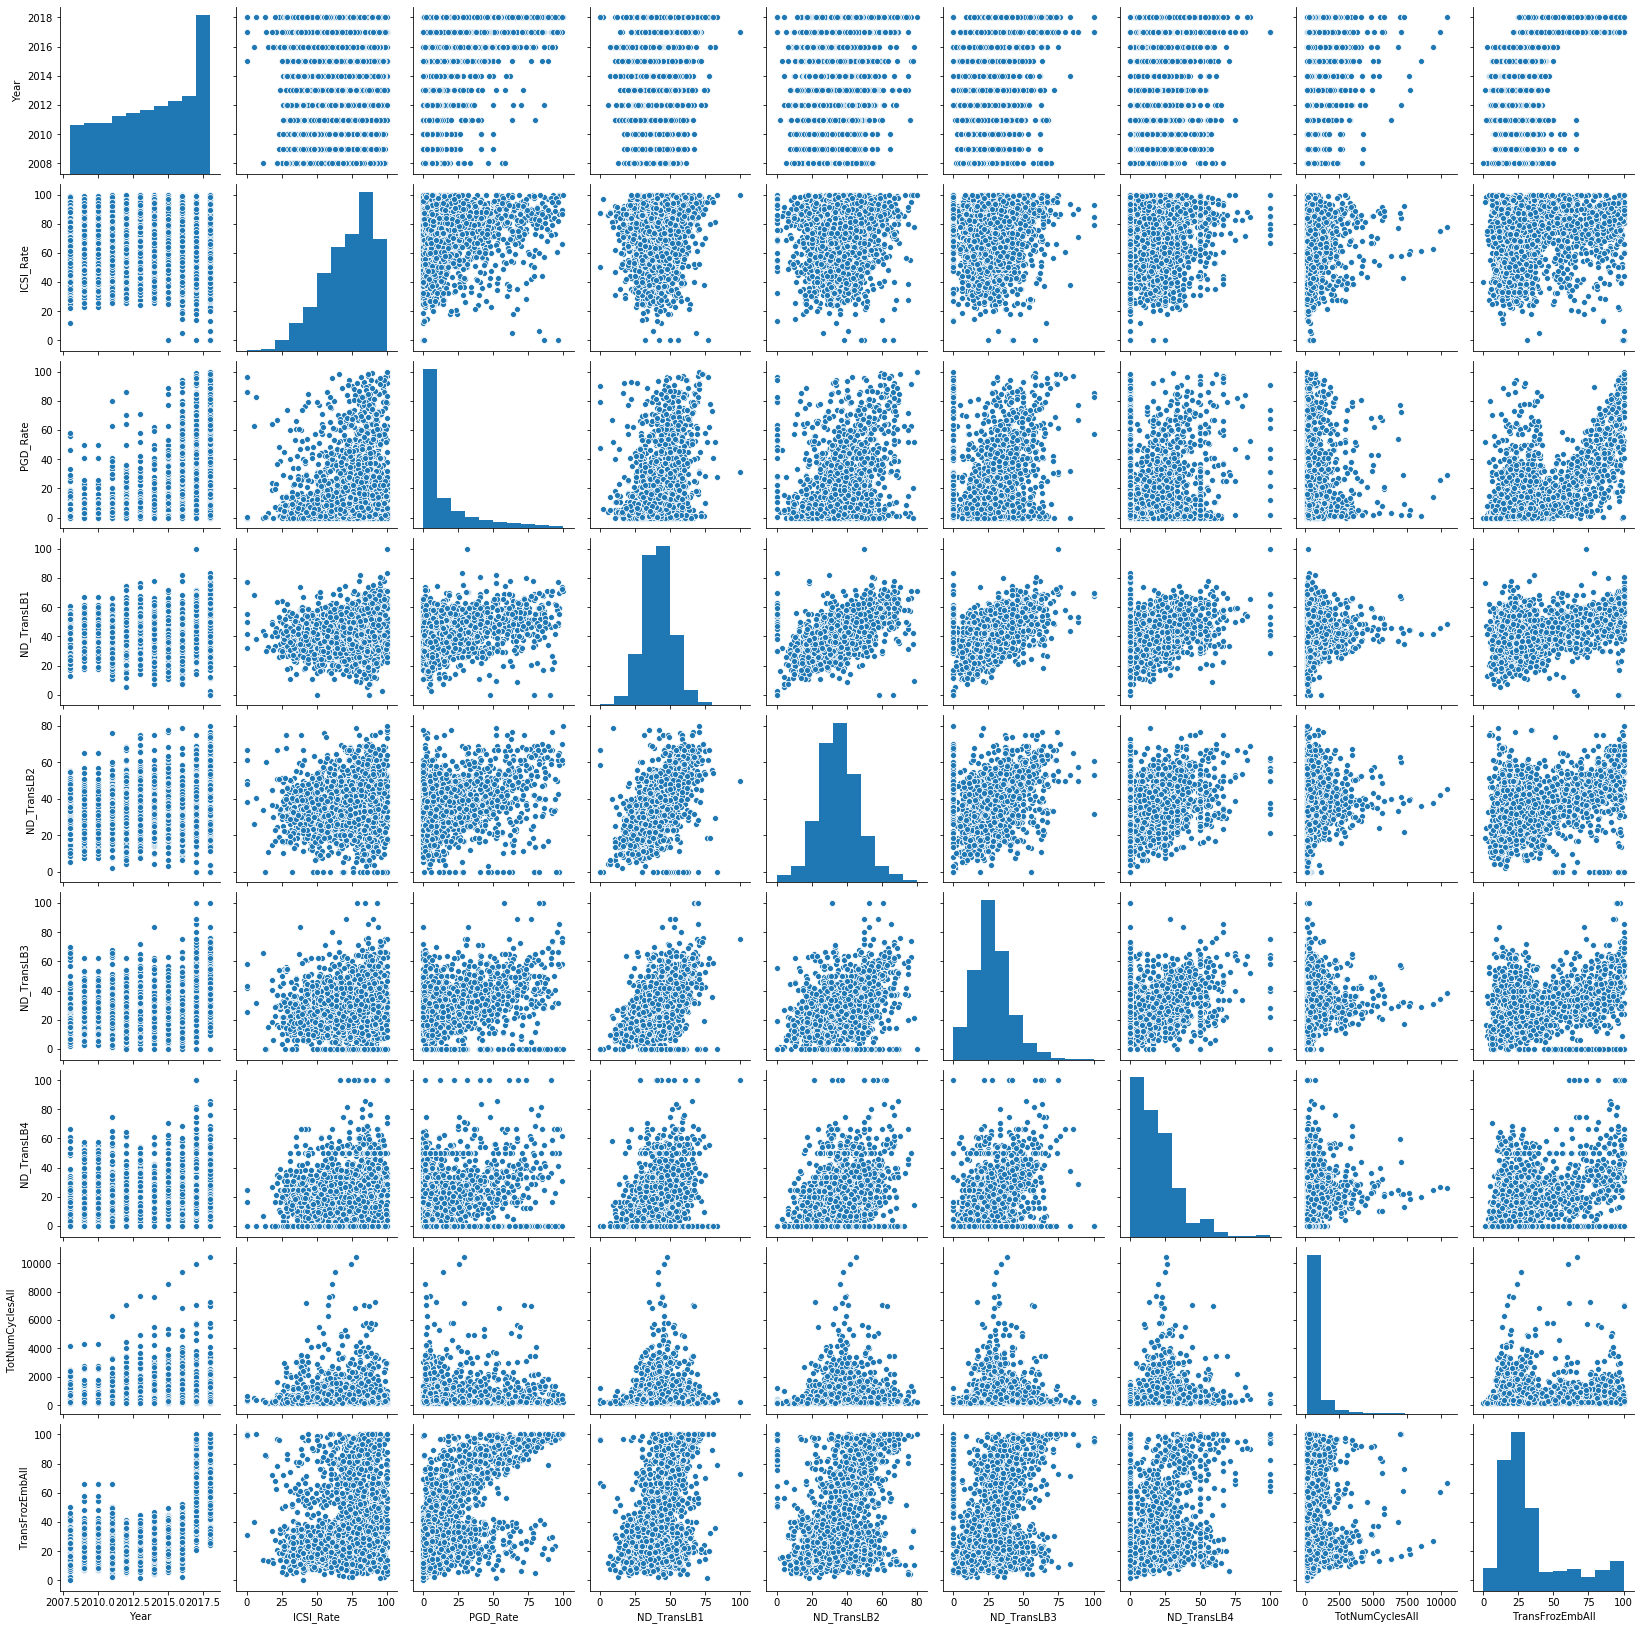

In [174]:
sns.pairplot(df_join)

<Figure size 720x432 with 0 Axes>

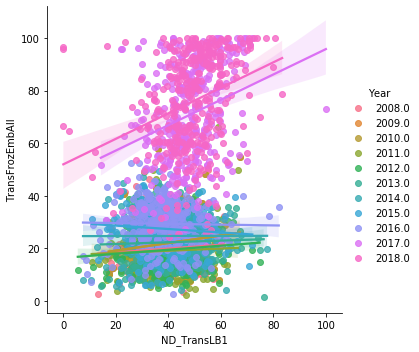

In [178]:
plt.figure(figsize=(10,6))
# Diag_TubalRate','Diag_OvulatoryRate','Diag_DORRate','Diag_EndometriosisRate','Diag_UterineRate', # Reason
# Diag_MaleRate','Diag_OtherRate',
sns.lmplot(x='ND_TransLB1',y='TransFrozEmbAll',data = df_join,hue='Year')

Index(['PrevClinName1', 'ClinCityCode', 'ClinStateCode', 'Year', 'ICSI_Rate',
       'PGD_Rate', 'ND_TransLB1', 'ND_TransLB2', 'ND_TransLB3', 'ND_TransLB4',
       'TotNumCyclesAll', 'TransFrozEmbAll'],
      dtype='object')

In [207]:
def harmonize_clinic_name(df):
    # list of name to match to
    df_2018_names = df[df['Year']==2018]['PrevClinName1'] + " " + df[df['Year']==2018]["ClinCityCode"]
    df_rest_year_names = df[df['Year']!=2018]['PrevClinName1'] + " " + df[df['Year']!=2018]["ClinCityCode"]
    df_new_name_list = []
    
    #Now compare with names between 2008 and 2018
    
    for name in df_rest_year_names:
        
        if name in df_2018_names:
            df_new_name_list.append(name)
            continue
            
        else:
            match = False
            max_score = 80
            for name2 in df_2018_names:
                score = fuzz.token_set_ratio(name, name2)
                min_score = 90
                i = 0
                if (score > min_score) & (score > max_score):
                    max_score = score
                    name_to_add = name2
                    match = True
                    df_new_name_list.append(name_to_add)
                    break
                    
            if not match:
                df_new_name_list.append(name)
                
    for name in df_2018_names:
        df_new_name_list.append(name)
        
    return df_new_name_list
                          
        

In [208]:
names = harmonize_clinic_name(df_join)
len(names)

3166

In [214]:
df_join.columns

Index(['PrevClinName1', 'ClinCityCode', 'ClinStateCode', 'Year', 'ICSI_Rate',
       'PGD_Rate', 'ND_TransLB1', 'ND_TransLB2', 'ND_TransLB3', 'ND_TransLB4',
       'TotNumCyclesAll', 'TransFrozEmbAll', 'ClinicNames'],
      dtype='object')

In [212]:
df_join["ClinicNames"] = names

In [213]:
df_join.to_csv('df_concat.csv')

In [219]:
print(len(df_join.PrevClinName1.unique()))
print(len(df_join.ClinicNames.unique()))
print(len(df_join[df_join.Year==2018]['ClinicNames'].unique()))

592
512
357


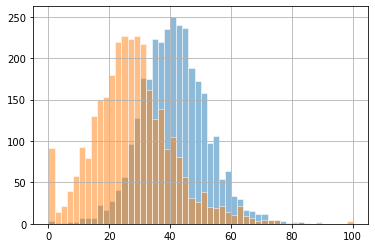

In [226]:
df_join['ND_TransLB1'].hist(bins=50,edgecolor='w',alpha=0.5)
df_join['ND_TransLB3'].hist(bins=50,edgecolor='w',alpha=0.5)

In [239]:
df_test = df_join[df_join['ND_TransLB1']>55]

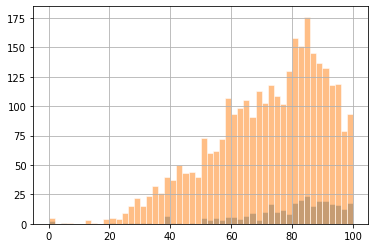

In [247]:
df_test['ICSI_Rate'].hist(bins=50,edgecolor='w',alpha=0.5)
df_join['ICSI_Rate'].hist(bins=50,edgecolor='w',alpha=0.5)

In [265]:
#Create csv of unique clinic names for scraping
uniq_clinics = pd.DataFrame(df_join['ClinicNames'].unique(),columns=["Clinic_Name"])
uniq_clinics.to_csv('uniq_clinics.csv')

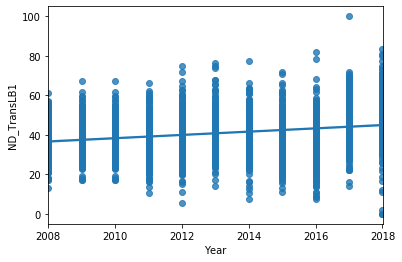

In [266]:
sns.regplot(x='Year',y='ND_TransLB1',data = df_join)

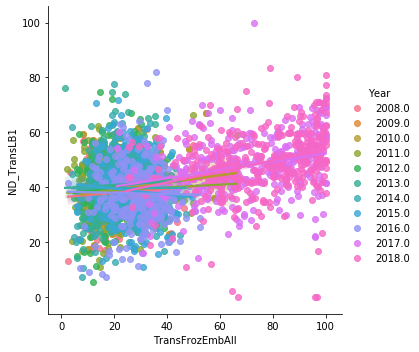

In [269]:
sns.lmplot(x='TransFrozEmbAll',y='ND_TransLB1',data = df_join, hue='Year')

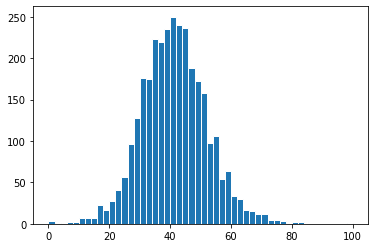

In [272]:
plt.hist(df_join.ND_TransLB1,bins=50,edgecolor='w')
plt.show()

In [278]:
df_join[df_join.ND_TransLB1>80]

,PrevClinName1,ClinCityCode,ClinStateCode,Year,ICSI_Rate,PGD_Rate,ND_TransLB1,ND_TransLB2,ND_TransLB3,ND_TransLB4,TotNumCyclesAll,TransFrozEmbAll,ClinicNames
3623,NEW DIRECTION FERTILITY CENTERS,GILBERT,ARIZONA,2016.0,81.0,52.0,82.050000,29.7,NaN,NaN,795.0,35.849057,NEW DIRECTION FERTILITY CENTERS GILBERT
4160,SANTA MONICA FERTILITY,SANTA MONICA,CALIFORNIA,2017.0,100.0,31.3,100.000000,50.0,75.000000,100.0,241.0,72.900000,SANTA MONICA FERTILITY SANTA MONICA
4611,SANTA MONICA FERTILITY,SANTA MONICA,CALIFORNIA,2018.0,100.0,27.6,83.333333,0.0,0.000000,0.0,355.0,78.900000,SANTA MONICA FERTILITY SANTA MONICA
4675,ADVANCED REPRODUCTIVE CENTER OF HAWAII,HONOLULU,HAWAII,2018.0,95.0,40.6,80.800000,54.2,58.823529,0.0,227.0,100.000000,ADVANCED REPRODUCTIVE CENTER OF HAWAII HONOLULU
